In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

print(os.getcwd())
print(os.listdir(os.getcwd()))

/Users/yuboyang/Desktop/3001/cat-in-the-dat-ii
['test.csv', 'img', 'train.csv', '.ipynb_checkpoints', 'data_visualization.ipynb', 'sample_submission.csv']


In [2]:
train = pd.read_csv(os.getcwd() + '/train.csv')
test = pd.read_csv(os.getcwd() + '/test.csv')

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      600000 non-null  int64  
 1   bin_0   582106 non-null  float64
 2   bin_1   581997 non-null  float64
 3   bin_2   582070 non-null  float64
 4   bin_3   581986 non-null  object 
 5   bin_4   581953 non-null  object 
 6   nom_0   581748 non-null  object 
 7   nom_1   581844 non-null  object 
 8   nom_2   581965 non-null  object 
 9   nom_3   581879 non-null  object 
 10  nom_4   581965 non-null  object 
 11  nom_5   582222 non-null  object 
 12  nom_6   581869 non-null  object 
 13  nom_7   581997 non-null  object 
 14  nom_8   582245 non-null  object 
 15  nom_9   581927 non-null  object 
 16  ord_0   581712 non-null  float64
 17  ord_1   581959 non-null  object 
 18  ord_2   581925 non-null  object 
 19  ord_3   582084 non-null  object 
 20  ord_4   582070 non-null  object 
 21  ord_5   58

In [3]:
nom = ['nom_0','nom_1','nom_2','nom_3','nom_4','nom_5','nom_6','nom_7','nom_8','nom_9']
ord_ = ['ord_0','ord_1','ord_2','ord_3','ord_4','ord_5']

In [4]:
train.head(5)

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


In [224]:
train.target.value_counts()

0    487677
1    112323
Name: target, dtype: int64

In [225]:
train.groupby('ord_1').target.value_counts()

ord_1        target
Contributor  0          90825
             1          18996
Expert       0         113178
             1          26499
Grandmaster  0          73561
             1          22305
Master       0          59913
             1          16085
Novice       0         135540
             1          25057
Name: target, dtype: int64

In [226]:
train[pd.isnull(train.ord_1)].target.value_counts()

0    14660
1     3381
Name: target, dtype: int64

In [5]:
print(train['bin_3'].unique())
print(train['bin_4'].unique())

['F' 'T' nan]
['N' 'Y' nan]


Text(0, 0.5, 'day of the week')

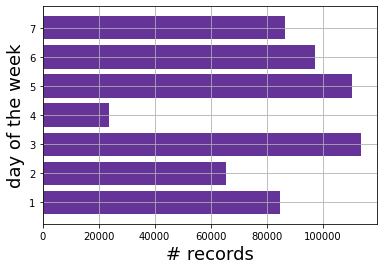

In [6]:
cnt = list(train['day'].value_counts(sort=False))
label = list(train['day'].value_counts(sort=False).index)

plt.barh(label, cnt, color="rebeccapurple")
plt.grid(True)
plt.xlabel('# records',fontsize=18)
plt.ylabel('day of the week',fontsize=18)

Text(0, 0.5, 'month')

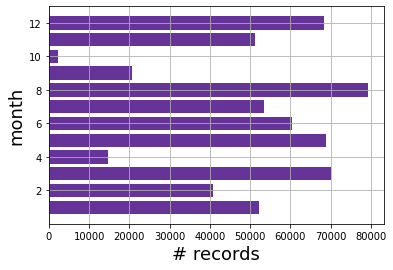

In [7]:
cnt = list(train['month'].value_counts(sort=False))
label = list(train['month'].value_counts(sort=False).index)

plt.barh(label, cnt, color="rebeccapurple")
plt.grid(True)
plt.xlabel('# records',fontsize=18)
plt.ylabel('month',fontsize=18)

In [110]:
21//6

3

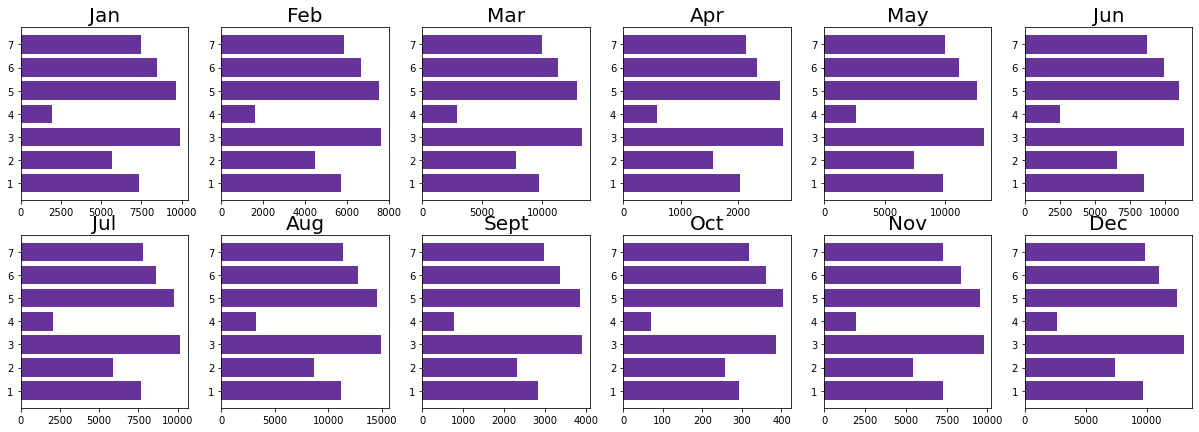

In [124]:
fig, ax = plt.subplots(2, 6, figsize=(21, 7))
month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']

for i in range(1,13):
    i_ = (i-1)//6
    j_ = (i-1)%6
    cnt = list(train[train.month==i]['day'].value_counts(sort=False))
    label = list(train[train.month==i]['day'].value_counts(sort=False).index)

    ax[i_][j_].barh(label, cnt, color="rebeccapurple")
    ax[i_][j_].set_title(month[i-1],fontsize=20)

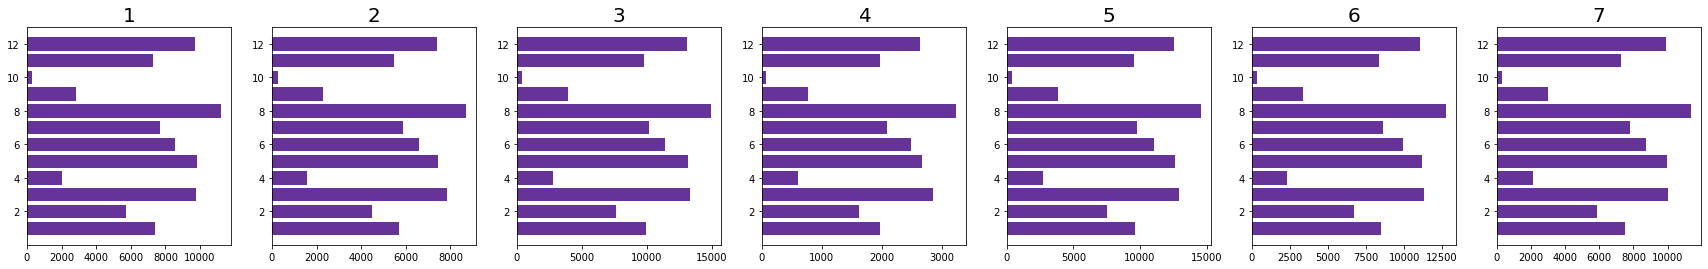

In [155]:
fig, ax = plt.subplots(1, 7, figsize=(30, 4))

for i in range(1,8):
    cnt = list(train[train.day==i]['month'].value_counts(sort=False))
    label = list(train[train.day==i]['month'].value_counts(sort=False).index)

    ax[i-1].barh(label, cnt, color="rebeccapurple")
    ax[i-1].set_title(str(i),fontsize=20)

<AxesSubplot:>

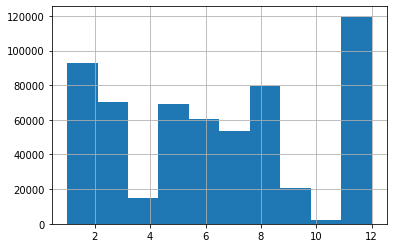

In [8]:
train['month'].hist()

In [9]:
for col in train.columns[1:]:
    print(col)
    print(train[col].value_counts())

bin_0
0.0    528377
1.0     53729
Name: bin_0, dtype: int64
bin_1
0.0    474018
1.0    107979
Name: bin_1, dtype: int64
bin_2
0.0    419845
1.0    162225
Name: bin_2, dtype: int64
bin_3
F    366212
T    215774
Name: bin_3, dtype: int64
bin_4
N    312344
Y    269609
Name: bin_4, dtype: int64
nom_0
Red      323286
Blue     205861
Green     52601
Name: nom_0, dtype: int64
nom_1
Triangle     164190
Polygon      152563
Trapezoid    119438
Circle       104995
Square        26503
Star          14155
Name: nom_1, dtype: int64
nom_2
Hamster    164897
Axolotl    152319
Lion       119504
Dog        104825
Cat         26276
Snake       14144
Name: nom_2, dtype: int64
nom_3
India         164869
Costa Rica    151827
Russia        119840
Finland       104601
Canada         26425
China          14317
Name: nom_3, dtype: int64
nom_4
Theremin    308621
Bassoon     196639
Oboe         49996
Piano        26709
Name: nom_4, dtype: int64
nom_5
fc8fc7e56    977
360a16627    972
423976253    961
7917d446c    

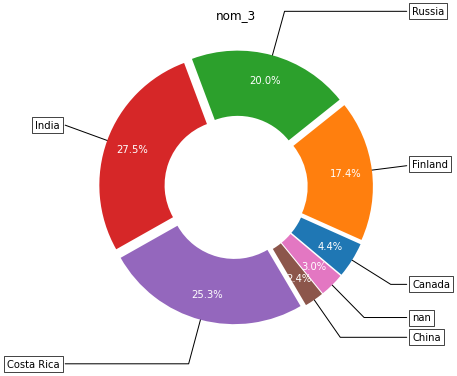

In [10]:

sizes = list(train['nom_3'].value_counts(sort=False))
labels = list(train['nom_3'].value_counts(sort=False).index)

if pd.isnull(train['nom_3']).sum()>0:
    sizes.append(pd.isnull(train['nom_3']).sum())
    labels.append('nan')

    
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))

explode = np.repeat(0.05,len(sizes))
wedges, texts,autotexts= ax.pie(sizes,wedgeprops=dict(width=0.5),\
                                explode=explode,\
                                autopct='%1.1f%%',pctdistance=0.8, startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

for autotext in autotexts:
    autotext.set_color('white')

ax.set_title('nom_3')
plt.show()


In [11]:
autotexts[0]

Text(0.7202703459474523, -0.4513431385860845, '4.4%')

In [12]:
def pie_plot(col):
    sizes = list(train[col].value_counts(sort=True))
    labels = list(train[col].value_counts(sort=True).index)

    if pd.isnull(train[col]).sum()>0:
        sizes.append(pd.isnull(train[col]).sum())
        labels.append('nan')
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))

    explode = np.repeat(0.05,len(sizes))
    wedges, texts,autotexts= ax.pie(sizes,wedgeprops=dict(width=0.5),\
                                explode=explode,\
                                autopct='%1.1f%%',pctdistance=0.8, startangle=-160)

    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center",fontsize=15)

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(22)
    

    ax.set_title(col,fontsize=20)
    plt.show()

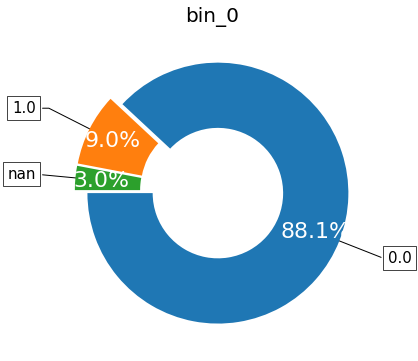

In [140]:
pie_plot('bin_0')

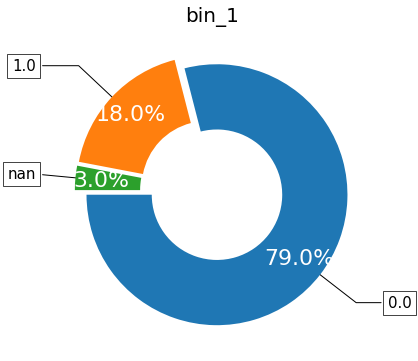

In [141]:
pie_plot('bin_1')

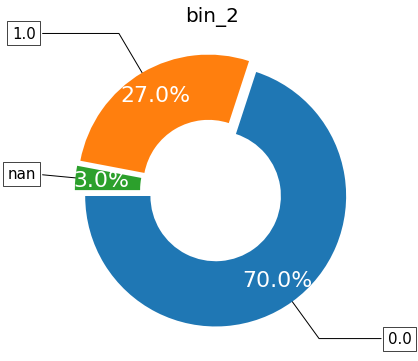

In [142]:
pie_plot('bin_2')

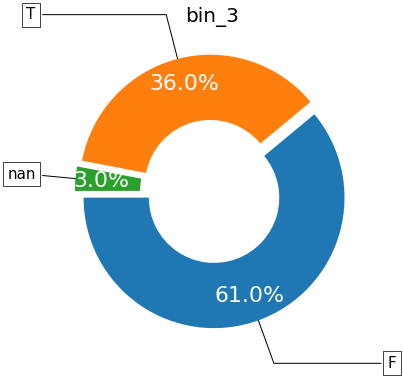

In [143]:
pie_plot('bin_3')

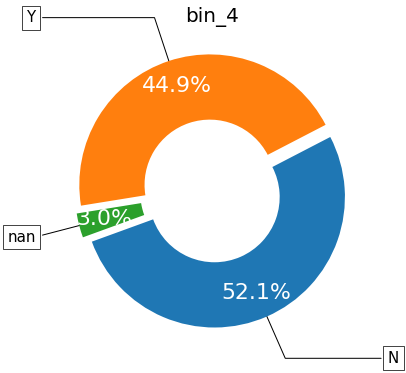

In [148]:
pie_plot('bin_4')

In [154]:
train[['bin_0','bin_1','bin_2','bin_3','bin_4']].dropna()

,bin_0,bin_1,bin_2,bin_3,bin_4
0,0.0,0.0,0.0,F,N
1,1.0,1.0,0.0,F,Y
2,0.0,1.0,0.0,F,N
6,0.0,0.0,0.0,F,N
7,0.0,0.0,1.0,T,N
...,...,...,...,...,...
599995,0.0,1.0,0.0,T,N
599996,1.0,0.0,0.0,T,Y
599997,0.0,0.0,0.0,F,Y
599998,1.0,1.0,0.0,F,Y


In [13]:
def cate(row):
    if row=='T' or row=='Y':
        row=1.
    elif row=='F' or row=='N':
        row=0.
    return row

temp = train[['bin_0','bin_1','bin_2','bin_3','bin_4']]
temp['bin_3'] = temp['bin_3'].map(cate)
temp['bin_4'] = temp['bin_4'].map(cate)
temp.corr()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,bin_0,bin_1,bin_2,bin_3,bin_4
bin_0,1.000000,-0.002485,0.002228,0.000095,-0.001333
bin_1,-0.002485,1.000000,0.001783,0.000146,0.000448
bin_2,0.002228,0.001783,1.000000,-0.000046,0.000218
bin_3,0.000095,0.000146,-0.000046,1.000000,0.001808
bin_4,-0.001333,0.000448,0.000218,0.001808,1.000000


In [14]:
for col in nom:
    print(col,len(train[col].unique()))
    print(pd.isnull(train[col]).sum()/600000.)
    if len(train[col].unique())<30:
        print(train[col].unique())

nom_0 4
0.03042
['Red' 'Blue' 'Green' nan]
nom_1 7
0.03026
['Trapezoid' 'Star' nan 'Circle' 'Triangle' 'Polygon' 'Square']
nom_2 7
0.030058333333333333
['Hamster' 'Axolotl' 'Lion' 'Dog' 'Cat' 'Snake' nan]
nom_3 7
0.03020166666666667
['Russia' nan 'Canada' 'Finland' 'Costa Rica' 'China' 'India']
nom_4 5
0.030058333333333333
['Bassoon' 'Theremin' nan 'Oboe' 'Piano']
nom_5 1221
0.02963
nom_6 1520
0.030218333333333333
nom_7 223
0.030005
nom_8 223
0.029591666666666665
nom_9 2219
0.030121666666666668


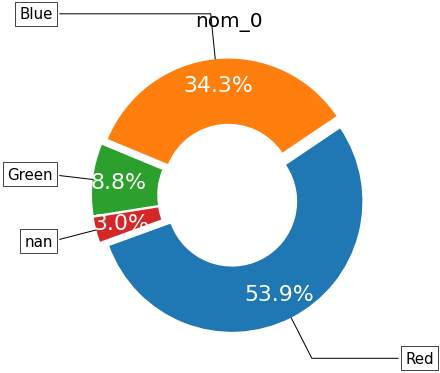

In [15]:
pie_plot('nom_0')

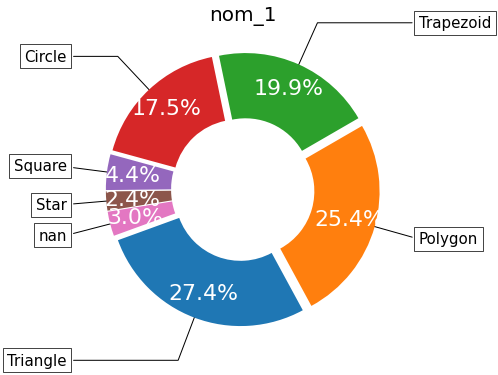

In [16]:
pie_plot('nom_1')

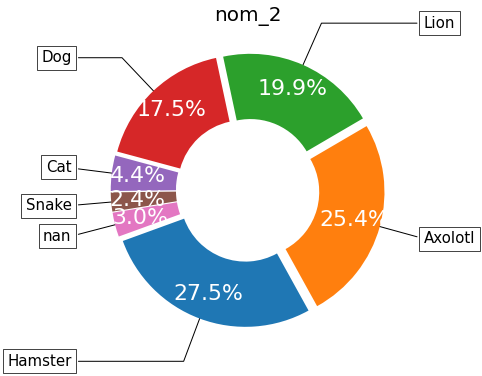

In [17]:
pie_plot('nom_2')

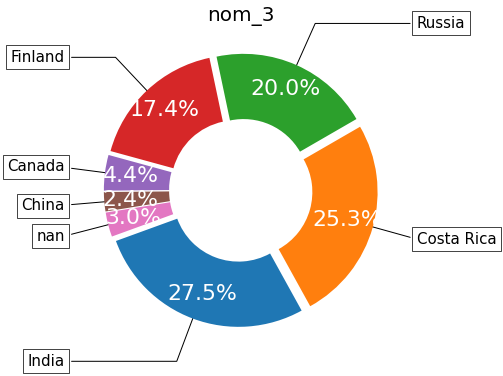

In [18]:
pie_plot('nom_3')

In [21]:
train[['nom_1','nom_2']]

,nom_1,nom_2
0,Trapezoid,Hamster
1,Star,Axolotl
2,NaN,Hamster
3,Circle,Hamster
4,Triangle,Hamster
...,...,...
599995,Polygon,Axolotl
599996,Polygon,Dog
599997,Circle,Axolotl
599998,Polygon,Axolotl


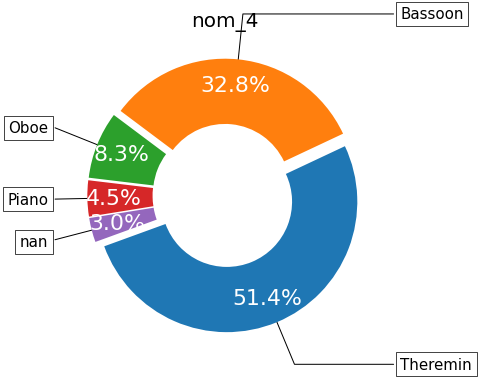

In [20]:
pie_plot('nom_4')

In [48]:
train['nom_9'].value_counts()

8f3276a6e    565
65b262989    564
c5361037c    560
9bc905a9d    558
01a1a04c5    557
            ... 
47a0cd9da      2
3d19cd31d      2
978258393      2
d1e6704ed      1
5f565a682      1
Name: nom_9, Length: 2218, dtype: int64

Text(0.5, 1.0, 'nom_5 value_counts')

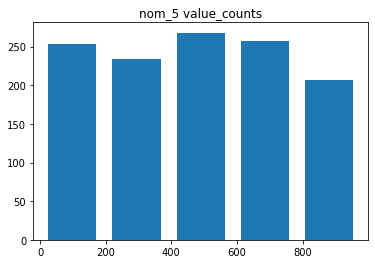

In [63]:
plt.hist(train['nom_5'].value_counts(),bins=5,rwidth=0.75)
plt.title('nom_5 value_counts')

Text(0.5, 1.0, 'nom_6 value_counts')

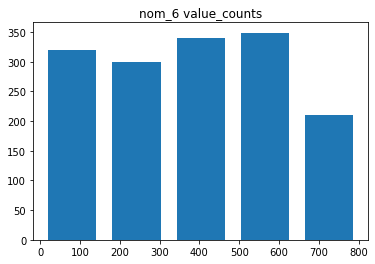

In [64]:
plt.hist(train['nom_6'].value_counts(),bins=5,rwidth=0.75)
plt.title('nom_6 value_counts')

Text(0.5, 1.0, 'nom_7 value_counts')

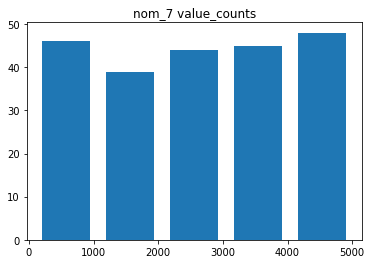

In [65]:
plt.hist(train['nom_7'].value_counts(),bins=5,rwidth=0.75)
plt.title('nom_7 value_counts')

Text(0.5, 1.0, 'nom_8 value_counts')

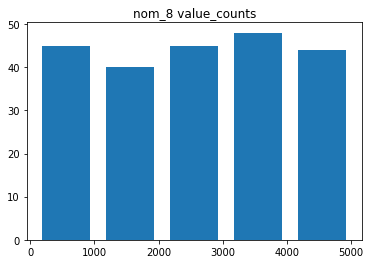

In [66]:
plt.hist(train['nom_8'].value_counts(),bins=5,rwidth=0.75)
plt.title('nom_8 value_counts')

Text(0.5, 1.0, 'nom_9 value_counts')

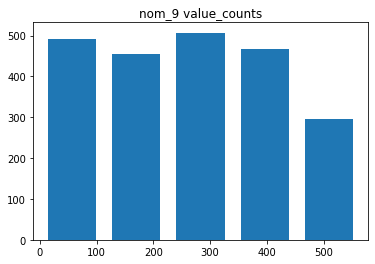

In [67]:
plt.hist(train['nom_9'].value_counts(),bins=5,rwidth=0.75)
plt.title('nom_9 value_counts')

Text(0.5, 0.98, 'occurance ranked by frequency')

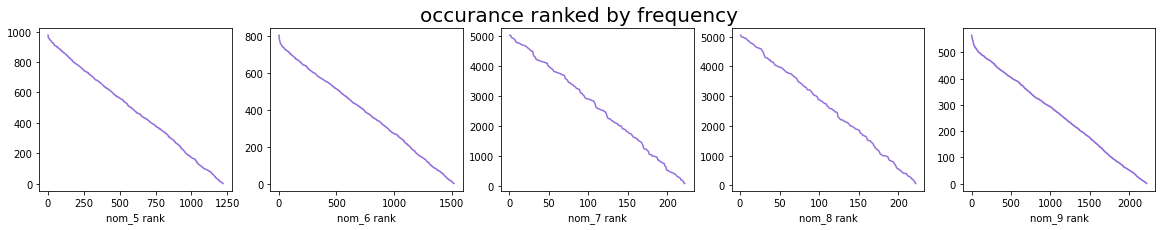

In [223]:
fig, ax = plt.subplots(1, 5, figsize=(20, 3))

for i in range(5,10):
    col = 'nom_'+str(i)
    cnt = train[col].value_counts()
    x = range(1,1+len(cnt))
    ax[i-5].plot(x,cnt,color='mediumpurple')
    ax[i-5].set_xlabel(col+ ' rank')
    
plt.suptitle('occurance ranked by frequency', fontsize=20)

In [85]:
for col in ord_:
    print(col,len(train[col].unique()))
    print(pd.isnull(train[col]).sum()/600000.)
    if len(train[col].unique())<30:
        print(train[col].unique())
        print(train[col].value_counts())

ord_0 4
0.03048
[ 3.  1.  2. nan]
1.0    227917
3.0    197798
2.0    155997
Name: ord_0, dtype: int64
ord_1 6
0.030068333333333332
['Contributor' 'Grandmaster' nan 'Novice' 'Expert' 'Master']
Novice         160597
Expert         139677
Contributor    109821
Grandmaster     95866
Master          75998
Name: ord_1, dtype: int64
ord_2 7
0.030125
['Hot' 'Warm' 'Freezing' 'Lava Hot' 'Cold' 'Boiling Hot' nan]
Freezing       142726
Warm           124239
Cold            97822
Boiling Hot     84790
Hot             67508
Lava Hot        64840
Name: ord_2, dtype: int64
ord_3 16
0.02986
['c' 'e' 'n' 'a' 'h' 'b' 'd' 'k' 'g' 'o' 'i' 'm' nan 'f' 'l' 'j']
n    70982
a    65321
m    57980
c    56675
h    55744
o    45464
b    44795
e    38904
k    38718
i    34763
d    30634
f    29450
g     6180
j     3639
l     2835
Name: ord_3, dtype: int64
ord_4 27
0.029883333333333335
['U' 'X' 'P' 'C' 'Q' 'R' 'Y' 'N' 'I' 'O' 'M' 'E' 'V' 'K' 'G' 'B' 'H' nan
 'T' 'W' 'A' 'F' 'D' 'S' 'J' 'L' 'Z']
N    39978
P    3789

In [200]:
train[train.ord_3=='n'].ord_4.value_counts()

N    4662
P    4496
Y    4369
A    4307
R    3992
U    3890
C    3881
X    3851
M    3830
H    3719
Q    3550
T    3439
O    3034
B    2967
E    2581
K    2556
I    2316
D    2018
F    1977
W     972
Z     704
S     539
G     401
V     398
J     263
L     184
Name: ord_4, dtype: int64

In [201]:
train.ord_5.unique()

array(['Pw', 'pE', 'eN', nan, 'OZ', 'wa', 'rg', 'PS', 'mX', 'hG', 'xF',
       'RV', 'Nh', 'dp', 'SS', 'OM', 'Rv', 'HF', 'iS', 'HK', 'Ib', 'AW',
       'mi', 'jf', 'Tz', 'ok', 'nS', 'Sz', 'sf', 'Fl', 'fV', 'iv', 'US',
       'dh', 'Io', 'RD', 'oI', 'DN', 'IS', 'oh', 'YJ', 'vq', 'us', 'sY',
       'th', 'Ey', 'AI', 'Mg', 'oU', 'Dj', 'TH', 'CN', 'aA', 'tT', 'Wr',
       'TZ', 'mo', 'rM', 'Pk', 'UV', 'RT', 'DT', 'Hk', 'Dn', 'nj', 'gL',
       'cy', 'JT', 'XC', 'lA', 'TL', 'zp', 'XM', 'AG', 'WW', 'GZ', 'MV',
       'Bx', 'oJ', 'ze', 'Rj', 'LY', 'Iq', 'gc', 'LS', 'hx', 'JQ', 'fO',
       'vx', 'MX', 'ly', 'BX', 'Yr', 'XR', 'yE', 'Sk', 'aE', 'wU', 'rA',
       'Ji', 'qN', 'nn', 'kv', 'pB', 'sc', 'EC', 'kT', 'be', 'uQ', 'DI',
       'hT', 'pl', 'tn', 'xG', 'NT', 'fe', 'lS', 'Mq', 'Yi', 'BL', 'AU',
       'ht', 'Ro', 'al', 'mD', 'ur', 'DR', 'Re', 'XI', 'sF', 'Rz', 'Lo',
       'In', 'Kq', 'cY', 'uZ', 'rl', 'zc', 'XU', 'CU', 'lR', 'xB', 'pT',
       'gj', 'Ox', 'yK', 'vw', 'Ay', 'HO', 'TP', 'ep

In [209]:
ord5 = ['Pw', 'pE', 'eN',  'OZ', 'wa', 'rg', 'PS', 'mX', 'hG', 'xF',
       'RV', 'Nh', 'dp', 'SS', 'OM', 'Rv', 'HF', 'iS', 'HK', 'Ib', 'AW',
       'mi', 'jf', 'Tz', 'ok', 'nS', 'Sz', 'sf', 'Fl', 'fV', 'iv', 'US',
       'dh', 'Io', 'RD', 'oI', 'DN', 'IS', 'oh', 'YJ', 'vq', 'us', 'sY',
       'th', 'Ey', 'AI', 'Mg', 'oU', 'Dj', 'TH', 'CN', 'aA', 'tT', 'Wr',
       'TZ', 'mo', 'rM', 'Pk', 'UV', 'RT', 'DT', 'Hk', 'Dn', 'nj', 'gL',
       'cy', 'JT', 'XC', 'lA', 'TL', 'zp', 'XM', 'AG', 'WW', 'GZ', 'MV',
       'Bx', 'oJ', 'ze', 'Rj', 'LY', 'Iq', 'gc', 'LS', 'hx', 'JQ', 'fO',
       'vx', 'MX', 'ly', 'BX', 'Yr', 'XR', 'yE', 'Sk', 'aE', 'wU', 'rA',
       'Ji', 'qN', 'nn', 'kv', 'pB', 'sc', 'EC', 'kT', 'be', 'uQ', 'DI',
       'hT', 'pl', 'tn', 'xG', 'NT', 'fe', 'lS', 'Mq', 'Yi', 'BL', 'AU',
       'ht', 'Ro', 'al', 'mD', 'ur', 'DR', 'Re', 'XI', 'sF', 'Rz', 'Lo',
       'In', 'Kq', 'cY', 'uZ', 'rl', 'zc', 'XU', 'CU', 'lR', 'xB', 'pT',
       'gj', 'Ox', 'yK', 'vw', 'Ay', 'HO', 'TP', 'ep', 'ne', 'Oe', 'mP',
       'cR', 'IA', 'QV', 'Ty', 'qP', 'gK', 'wJ', 'cg', 'zf', 'WC', 'NS',
       'Yb', 'kB', 'MU', 'kP', 'FH', 'fF', 'jp', 'gt', 'Qm', 'Cn', 'pZ',
       'nf', 'ja', 'Tg', 'uP', 'uW', 'FB', 'uI', 'MF', 'RB', 'SL', 'PG',
       'vQ', 'eA', 'gV', 'Zv']

sorted(ord5)

['AG',
 'AI',
 'AU',
 'AW',
 'Ay',
 'BL',
 'BX',
 'Bx',
 'CN',
 'CU',
 'Cn',
 'DI',
 'DN',
 'DR',
 'DT',
 'Dj',
 'Dn',
 'EC',
 'Ey',
 'FB',
 'FH',
 'Fl',
 'GZ',
 'HF',
 'HK',
 'HO',
 'Hk',
 'IA',
 'IS',
 'Ib',
 'In',
 'Io',
 'Iq',
 'JQ',
 'JT',
 'Ji',
 'Kq',
 'LS',
 'LY',
 'Lo',
 'MF',
 'MU',
 'MV',
 'MX',
 'Mg',
 'Mq',
 'NS',
 'NT',
 'Nh',
 'OM',
 'OZ',
 'Oe',
 'Ox',
 'PG',
 'PS',
 'Pk',
 'Pw',
 'QV',
 'Qm',
 'RB',
 'RD',
 'RT',
 'RV',
 'Re',
 'Rj',
 'Ro',
 'Rv',
 'Rz',
 'SL',
 'SS',
 'Sk',
 'Sz',
 'TH',
 'TL',
 'TP',
 'TZ',
 'Tg',
 'Ty',
 'Tz',
 'US',
 'UV',
 'WC',
 'WW',
 'Wr',
 'XC',
 'XI',
 'XM',
 'XR',
 'XU',
 'YJ',
 'Yb',
 'Yi',
 'Yr',
 'Zv',
 'aA',
 'aE',
 'al',
 'be',
 'cR',
 'cY',
 'cg',
 'cy',
 'dh',
 'dp',
 'eA',
 'eN',
 'ep',
 'fF',
 'fO',
 'fV',
 'fe',
 'gK',
 'gL',
 'gV',
 'gc',
 'gj',
 'gt',
 'hG',
 'hT',
 'ht',
 'hx',
 'iS',
 'iv',
 'ja',
 'jf',
 'jp',
 'kB',
 'kP',
 'kT',
 'kv',
 'lA',
 'lR',
 'lS',
 'ly',
 'mD',
 'mP',
 'mX',
 'mi',
 'mo',
 'nS',
 'ne',
 'nf',
 'nj',

In [203]:
train.ord_5.value_counts()[:30]

Fl    10562
DN     9527
Sz     8654
RV     5648
oJ     5596
PS     5447
vq     5443
WW     5385
XC     5383
AG     5364
GZ     5348
be     5313
DR     5292
vx     5237
tn     5231
lS     5229
hG     5224
mo     5174
Ib     5129
mD     5120
TL     5112
TZ     5092
Hk     5033
Nh     4986
YJ     4968
rl     4961
RD     4949
gc     4926
uQ     4923
pB     4852
Name: ord_5, dtype: int64

Text(0, 0.5, 'ord_0')

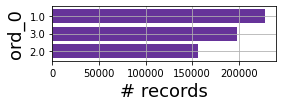

In [190]:
plt.figure(figsize=(4,1))
cnt = list(train['ord_0'].value_counts(sort=False))
label = list(train['ord_0'].value_counts(sort=False).index)

cnt_ord = [cnt[i] for i in np.argsort(cnt)]
label_ord = [label[i] for i in np.argsort(cnt)]

plt.barh([str(i) for i in label_ord], cnt_ord, color="rebeccapurple")
plt.grid(True)
plt.xlabel('# records',fontsize=18)
plt.ylabel('ord_0',fontsize=18)

Text(0, 0.5, 'ord_0')

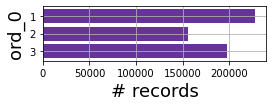

In [192]:
plt.figure(figsize=(4,1))
plt.barh(['3','2','1'], [197798,155997,227917], color="rebeccapurple")
plt.grid(True)
plt.xlabel('# records',fontsize=18)
plt.ylabel('ord_0',fontsize=18)

Text(0, 0.5, 'ord_1')

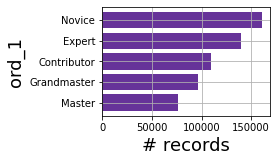

In [168]:
plt.figure(figsize=(3,2))
cnt = list(train['ord_1'].value_counts(sort=False))
label = list(train['ord_1'].value_counts(sort=False).index)

cnt_ord = [cnt[i] for i in np.argsort(cnt)]
label_ord = [label[i] for i in np.argsort(cnt)]

plt.barh(label_ord, cnt_ord, color="rebeccapurple")
plt.grid(True)
plt.xlabel('# records',fontsize=18)
plt.ylabel('ord_1',fontsize=18)

Text(0, 0.5, 'ord_1')

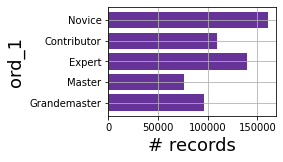

In [187]:
plt.figure(figsize=(3,2))

plt.barh(['Grandemaster','Master','Expert','Contributor','Novice'],\
         [95866,75998,139677,109821,160597], color="rebeccapurple")
plt.grid(True)
plt.xlabel('# records',fontsize=18)
plt.ylabel('ord_1',fontsize=18)

Text(0, 0.5, 'ord_2')

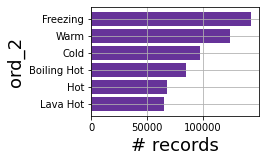

In [169]:
plt.figure(figsize=(3,2))
cnt = list(train['ord_2'].value_counts(sort=False))
label = list(train['ord_2'].value_counts(sort=False).index)

cnt_ord = [cnt[i] for i in np.argsort(cnt)]
label_ord = [label[i] for i in np.argsort(cnt)]

plt.barh(label_ord, cnt_ord, color="rebeccapurple")
plt.grid(True)
plt.xlabel('# records',fontsize=18)
plt.ylabel('ord_2',fontsize=18)

Text(0, 0.5, 'ord_2')

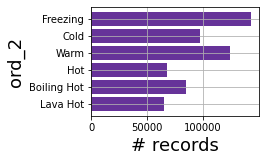

In [194]:
plt.figure(figsize=(3,2))
plt.barh(['Lava Hot','Boiling Hot','Hot','Warm','Cold','Freezing'],\
         [64840,84790,67508,124239,97822,142726], color="rebeccapurple")
plt.grid(True)
plt.xlabel('# records',fontsize=18)
plt.ylabel('ord_2',fontsize=18)

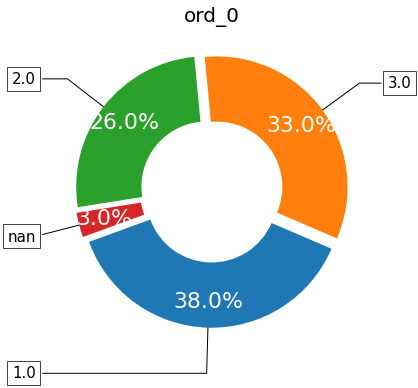

In [86]:
pie_plot('ord_0')

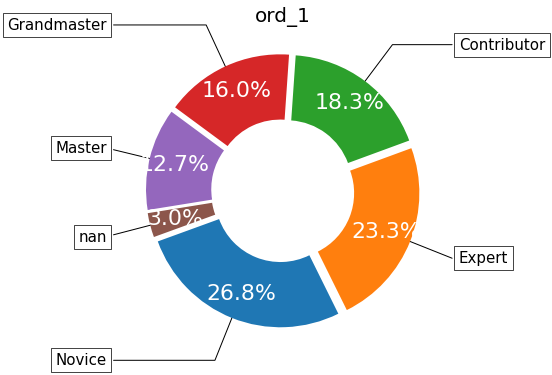

In [87]:
pie_plot('ord_1')

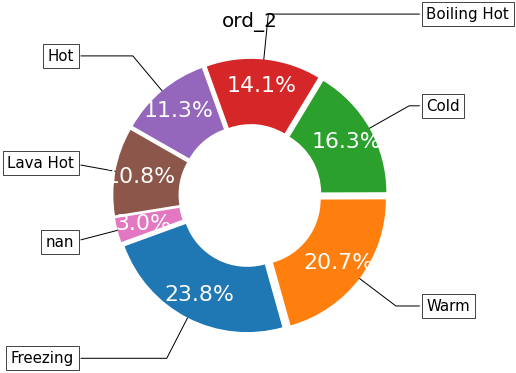

In [89]:
pie_plot('ord_2')

In [210]:
missing = pd.notnull(train).astype('int')
missing['id'] = train['id']
missing['target'] = train['target']

In [211]:
missing.corr()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,1.000000,0.000904,0.000318,-0.000562,-0.000736,0.000847,-0.001017,0.000462,0.000313,0.000037,...,0.001088,-0.000155,0.002092,-0.001652,0.000680,0.000064,0.001186,0.001996,-0.001137,-0.002376
bin_0,0.000904,1.000000,0.000752,0.000361,0.000675,-0.001504,-0.000761,0.000717,-0.001025,-0.002486,...,0.002007,0.000889,-0.001781,-0.002182,0.000673,-0.000272,0.002416,0.001243,0.001123,-0.000531
bin_1,0.000318,0.000752,1.000000,-0.001721,-0.001174,0.001287,-0.002426,-0.001812,0.001251,0.001728,...,-0.003160,-0.001235,0.001984,-0.001220,-0.000434,0.001779,0.000030,0.000020,0.002422,-0.000545
bin_2,-0.000562,0.000361,-0.001721,1.000000,0.001129,0.002848,-0.001506,0.001968,0.001723,0.000886,...,0.000912,0.001053,-0.000752,0.001653,0.001703,-0.000794,0.000907,-0.000889,0.000371,0.000441
bin_3,-0.000736,0.000675,-0.001174,0.001129,1.000000,0.001382,-0.000170,0.001419,-0.000656,0.002108,...,0.001165,-0.001879,0.000649,-0.001524,-0.002806,0.002620,-0.000854,0.001492,0.001887,-0.000393
bin_4,0.000847,-0.001504,0.001287,0.002848,0.001382,1.000000,-0.000284,0.003640,0.001402,-0.000573,...,0.000708,-0.000401,0.001277,0.002759,-0.000968,0.002103,0.000416,-0.000227,-0.000861,0.000162
nom_0,-0.001017,-0.000761,-0.002426,-0.001506,-0.000170,-0.000284,1.000000,0.000549,0.000078,-0.000524,...,0.000751,-0.000018,0.000693,-0.000502,0.000798,0.001913,0.000870,-0.000461,0.001355,0.000867
nom_1,0.000462,0.000717,-0.001812,0.001968,0.001419,0.003640,0.000549,1.000000,0.000927,-0.000588,...,-0.000563,-0.002003,-0.000736,0.000686,0.001078,-0.000546,-0.001149,0.001072,-0.000988,0.001993
nom_2,0.000313,-0.001025,0.001251,0.001723,-0.000656,0.001402,0.000078,0.000927,1.000000,-0.000495,...,0.000443,-0.001062,0.000270,-0.002473,0.001748,0.000863,-0.000428,0.000023,0.000647,0.000281
nom_3,0.000037,-0.002486,0.001728,0.000886,0.002108,-0.000573,-0.000524,-0.000588,-0.000495,1.000000,...,-0.002668,0.001568,0.001547,0.000177,-0.001092,0.000199,-0.002184,-0.000239,0.001584,0.000608


In [212]:
train.dropna().shape

(298042, 25)